In [8]:
pip install pygad numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 2.6 MB/s eta 0:00:00


Running GA for Traffic Signal Optimization...
 Optimized Signal Timings (sec)
Road A: 55.67s
Road B: 37.44s
Road C: 48.48s
Road D: 45.57s

Total Waiting Time: 468.38
Fitness Score: 0.00490445


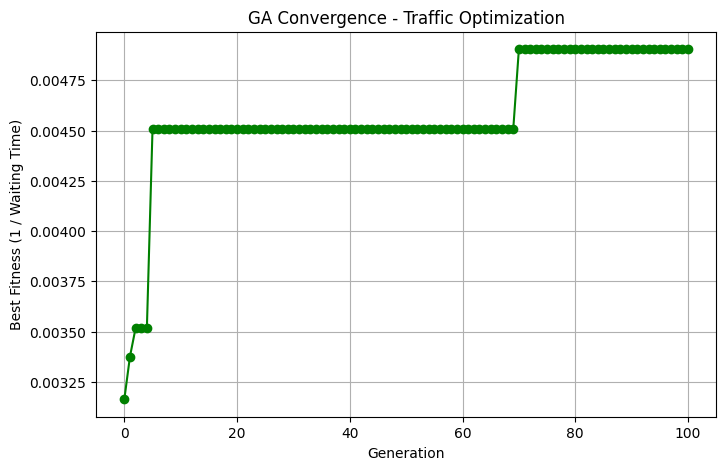

In [13]:


import pygad
import numpy as np
import random
import matplotlib.pyplot as plt

def traffic_wait_time(signal_times):
    """
    Simple traffic model:
    - 4-way intersection (A, B, C, D)
    - Each gene in signal_times = green time in seconds for that road
    - Returns total waiting time (lower = better)
    """

    cycle_time = np.sum(signal_times)
    if cycle_time < 100 or cycle_time > 240:
        return 1e6

    incoming_flow = np.array([random.randint(15, 50) for _ in range(4)])

    waiting_times = []
    for i in range(4):
        others = np.delete(signal_times, i)
        wait = (np.sum(others) / signal_times[i]) * incoming_flow[i]
        waiting_times.append(wait)

    total_wait = np.sum(waiting_times)
    return total_wait

def fitness_func(ga_instance, solution, solution_idx):
    total_wait = traffic_wait_time(solution)
    fitness = 1 / (1 + total_wait)
    return fitness


num_genes = 4
gene_space = {'low': 10, 'high': 90}

ga_instance = pygad.GA(
    num_generations=100,
    num_parents_mating=10,
    fitness_func=fitness_func,
    sol_per_pop=40,
    num_genes=num_genes,
    init_range_low=10,
    init_range_high=90,
    gene_space=gene_space,
    mutation_percent_genes=25,
    crossover_probability=0.9,
    parent_selection_type="tournament",
    keep_parents=1,
    allow_duplicate_genes=False,
    random_seed=42
)

print("Running GA for Traffic Signal Optimization...")
ga_instance.run()

best_solution, best_fitness, _ = ga_instance.best_solution()

print(" Optimized Signal Timings (sec)")
print(f"Road A: {best_solution[0]:.2f}s")
print(f"Road B: {best_solution[1]:.2f}s")
print(f"Road C: {best_solution[2]:.2f}s")
print(f"Road D: {best_solution[3]:.2f}s")

print(f"\nTotal Waiting Time: {traffic_wait_time(best_solution):.2f}")
print(f"Fitness Score: {best_fitness:.8f}")

plt.figure(figsize=(8, 5))
plt.plot(ga_instance.best_solutions_fitness, marker='o', color="green")
plt.title("GA Convergence - Traffic Optimization")
plt.xlabel("Generation")
plt.ylabel("Best Fitness (1 / Waiting Time)")
plt.grid(True)
plt.show()
